In [1]:
%%capture
%run ./algorithm/read_data.ipynb

### Decision Tree

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [3]:
dt_rgs = DecisionTreeRegressor()
dt_rgs.fit(X_train, y_train)
y_pred = dt_rgs.predict(X_test)
dt_rgs.score(X_test, y_test)

0.9329139806628756

In [18]:
parameters = {
    'max_depth': range(3, 14),
    'min_samples_split': range(2, 11),
}

In [20]:
tuned_tree = GridSearchCV(DecisionTreeRegressor(random_state=42), parameters, cv=5)
tuned_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': range(3, 14),
                         'min_samples_split': range(2, 11)})

In [25]:
print('Best params:', tuned_tree.best_params_)

Best params: {'max_depth': 12, 'min_samples_split': 10}
Feature used [3.97267033e-02 2.09489231e-03 5.99287040e-01 1.28595611e-01
 1.47967449e-01 1.68575637e-05 6.69046908e-03 2.71286377e-03
 7.01316320e-04 8.12840381e-04 4.59576602e-03 1.10267964e-03
 1.25449384e-03 1.03573826e-03 7.48157846e-03 7.00191443e-04
 1.50282648e-02 2.14212378e-03 1.20290474e-02 6.54105399e-04
 6.36192976e-03 4.44781977e-04 3.23963958e-03 1.53236165e-02]


<AxesSubplot:>

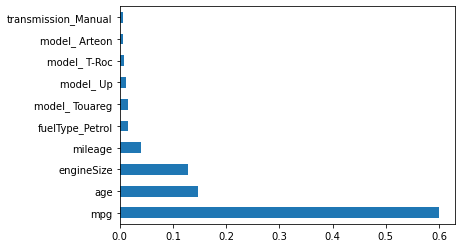

In [31]:
feature_importance = pd.Series(tuned_tree.best_estimator_.feature_importances_,index=X_train.columns)
feature_importance.nlargest(10).plot(kind='barh')

#### Before parameters tuning

In [7]:
regression_report(dt_rgs.predict(X_test))

Accuracy score: 			         0.9329
R-squared score: 			         0.9329
Mean Absolute Error(MAE): 		      1214.9598
Mean Squared Error (MSE): 		   3254072.4423
Root Mean Squared Error (RSME): 	      1803.9048
Root Mean Squared Log Error (RSMLE): 	         0.1064


#### After parameters tuning

In [22]:
regression_report(tuned_tree.predict(X_test))

Accuracy score: 			         0.9484
R-squared score: 			         0.9484
Mean Absolute Error(MAE): 		      1098.6613
Mean Squared Error (MSE): 		   2502896.1344
Root Mean Squared Error (RSME): 	      1582.0544
Root Mean Squared Log Error (RSMLE): 	         0.0941


### Visualize decision tree

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

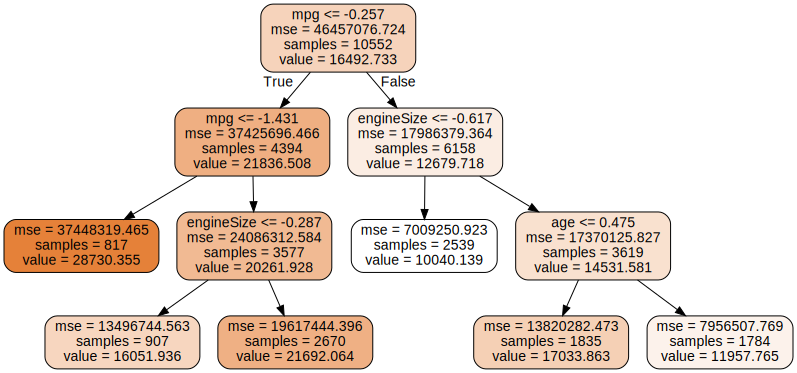

In [15]:
# visualize a simple one
simple_tree = DecisionTreeRegressor(random_state=42, max_depth=4, max_leaf_nodes=6).fit(X_train, y_train)
dot_file = export_graphviz(simple_tree,
                           out_file=None,
                           feature_names=X_train.columns,
                           filled=True,
                           rounded=True)
graphviz.Source(dot_file)

In [ ]:
# visualize the tuned tree
dot_file = export_graphviz(best_tree.best_estimator_,
                           out_file=None,
                           feature_names=X_train.columns,
                           filled=True,
                           rounded=True)
graphviz.Source(dot_file)